## 평균값의 차이 검정

### 2집단 데이터에 대한 t-검정

- 대응표본: 약을 먹기 전과 먹은 후 체온 차
- 독립표본: 큰 바늘로 잡은 물고기와 작은 바늘로 잡은 물고기 몸길이 차


### 대응표본 t-검정 (Paired t-test)

- 약을 먹기 전과 먹은 후 체온 차

#### 데이터 읽기 
- [열이름 한글일 때의 문제 해결](https://teddylee777.github.io/pandas/%EA%B3%B5%EA%B3%B5%EB%8D%B0%EC%9D%B4%ED%84%B0-%ED%95%9C%EA%B8%80%EA%B9%A8%EC%A7%90%ED%98%84%EC%83%81-%ED%95%B4%EA%B2%B0%EB%B0%A9%EB%B2%95) 

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

import random as rd
#sns.set()

%precision 3
%matplotlib inline

In [2]:
# 데이터 읽기 
paired_data=pd.read_csv("./data.csv")
paired_data

,teseter,Before,After
0,A,36.2,36.8
1,B,36.2,36.1
2,C,35.3,36.8
3,D,36.1,37.1
4,E,36.1,36.9


#### 차이가 0과 다른지를 확인해 봐야 약이 효과가 있는지 없는지 알 수 있음

- Paired 데이터의 차이가 0과 통계적으로 다른지 확인해야 함 
    - ttest_1samp: 차를 이용하는 경우
    - ttest_rel: 두 개의 데이터를 이용하는 경우 

In [3]:
paired_data['Diff'] = paired_data['After'] - paired_data['Before']
paired_data['Diff']

0    0.6
1   -0.1
2    1.5
3    1.0
4    0.8
Name: Diff, dtype: float64

In [5]:
temp = stats.ttest_1samp(paired_data['Diff'], 0)

temp

Ttest_1sampResult(statistic=2.901693483620596, pvalue=0.044043109730074276)

In [17]:
stats.ttest_rel(paired_data['Before'],paired_data['After'])

Ttest_relResult(statistic=-2.901693483620596, pvalue=0.044043109730074276)

### 독립표본 t-검정 (Welch 근사법)

$$ t = \frac{\hat{\mu_x}-\hat{\mu_y}}{\sqrt{\hat{\sigma}_x^2/m+\hat{\sigma}_y^2/n}} $$

- 서로 표본크기가 다르고 표본분산이 다른 경우도 사용가능 
- 위와 같은 데이터를 이용하여 검정
- 책에는 각각을 계산하여 검정하는 내용 제시
- 하나의 함수로 해결가능: ttest_ind, equal_var=False
- 기존에는 먼저 분산이 둘이 같은지를 검정한 후에 등분산 가정을 이용해 진행하는 방법이 있었음
- 언제나 같지 않다는 가정으로 시작하면 위의 과정 필요없음

In [18]:
stats.ttest_ind(paired_data['Before'],paired_data['After'],equal_var=False)

Ttest_indResult(statistic=-3.1557282344421034, pvalue=0.013484775682079892)

#### 물고기를 서로 다른 호수에서 50, 100 마리 잡은 경우

In [6]:
fish_a = np.random.normal(loc=4, scale=0.8, size=5)
fish_b = np.random.normal(loc=4.3, scale=0.8, size=10)

In [7]:
fish_a.mean()

4.426840363584885

In [8]:
stats.ttest_ind(fish_a, fish_b, equal_var=False)

Ttest_indResult(statistic=0.17622773719501567, pvalue=0.8663364056617495)

In [2]:
fish_a = np.random.normal(loc=4, scale=0.8, size=500)
fish_b = np.random.normal(loc=4.3, scale=0.8, size=50)

In [3]:
fish_a.mean()

3.9513279750181747

In [4]:
fish_b.mean()

4.356852246249944

In [5]:
stats.ttest_ind(fish_a, fish_b, equal_var=False)

Ttest_indResult(statistic=-3.3755664016824496, pvalue=0.001320164510669208)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdf735a4470>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdf735a4a20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdf735a4208>,
 'medians': [<matplotlib.lines.Line2D at 0x7fdf735a4fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fdf735b32e8>,
 'means': []}

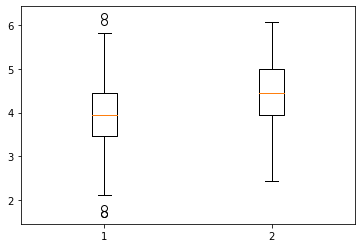

In [7]:
plt.boxplot([fish_a, fish_b])

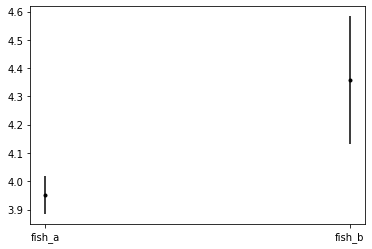

In [8]:
df = len(fish_a) - 1
tcrit1 = stats.t.ppf(0.975, df)
df = len(fish_b) - 1
tcrit2 = stats.t.ppf(0.975, df)

x = ['fish_a', 'fish_b']
y = [fish_a.mean(), fish_b.mean()]
_ = plt.errorbar(x, y, yerr=[tcrit1 * fish_a.std(ddof=1) / np.sqrt(len(fish_a)), tcrit1 * fish_b.std(ddof=1) / np.sqrt(len(fish_b))], fmt='.k')

### p 해킹

- 데이터를 원하는 결과를 얻기위해 임의로 다루지 말아야 함

## 분할표 검정 ($ \chi^2$ 검정)

[참고자료](https://m.blog.naver.com/PostView.nhn?blogId=definitice&logNo=221118885966&proxyReferer=https:%2F%2Fwww.google.com%2F)

[참고 동영상](https://www.youtube.com/watch?v=NTHA9Qa81R8)

- 독립성 검정
- 어떤 결과변수에 대한 두 효과의 영향이 서로 독립적인가를 판단함

$$ \chi^2 = \sum_{i=1}^{2}\sum_{j=1}^{2} \frac{(O_{ij} - E_{ij} )^2}{E_{ij}} $$

- 자유도 df=(r-1)(c-1)


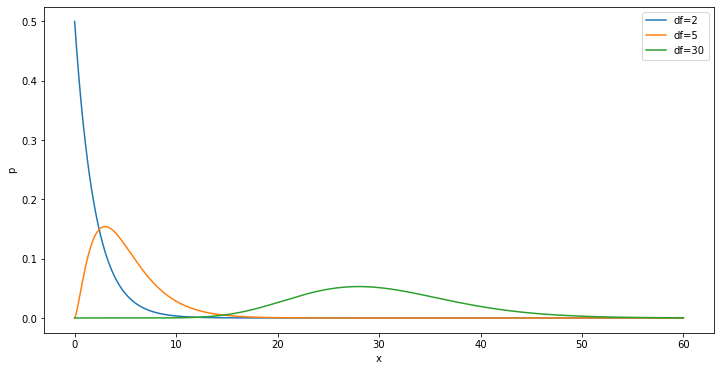

In [9]:
x = np.arange(0, 60, 0.01)
plt.figure(figsize=(12, 6))
plt.plot(x, stats.chi2.pdf(x, 2), label="df=2")
plt.plot(x, stats.chi2.pdf(x, 5), label="df=5")
plt.plot(x, stats.chi2.pdf(x, 30), label="df=30")
plt.xlabel("x")
plt.ylabel("p")

plt.legend()

<Figure size 432x288 with 0 Axes>

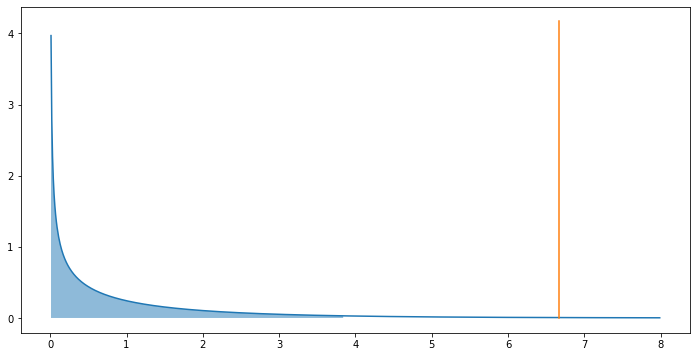

In [10]:
x = np.arange(0, 8, 0.01)
df = 1 # 자유도
fig = plt.figure()
plt.figure(figsize=(12, 6))
plt.plot(x, stats.chi2.pdf(x, df), label="df=1")
axes = plt.gca()
xcrit = stats.chi2.ppf(0.95, df)

xxx = np.arange(0, xcrit + 0.00000001, 0.01)
temp = stats.chi2.pdf(xxx, df)

plt.fill_between(xxx, 0, temp, alpha=0.5)

y = axes.get_ylim()[1]

obse = np.array([20, 230, 10, 40])
expt = np.array([25, 225, 5, 45])

chi2 = np.sum((obse - expt)**2 / expt)

xx = np.array([chi2, chi2])
yy = np.array([0, y])
plt.plot(xx, yy)

In [11]:
pval = 1 - stats.chi2.cdf(chi2, df)
pval

0.009823274507519297

#### scipy module 내 함수

- sp.stats.chisquare(f_obs=obse,f_exp=expt,ddof)
- sp.stats.chi2_contingency(cross, correction=False)

In [114]:
stats.chisquare(f_obs=obse,f_exp=expt,ddof=2)

Power_divergenceResult(statistic=6.666666666666666, pvalue=0.009823274507519247)

In [12]:
data=pd.read_csv("./data2.csv")

cross=pd.pivot_table(
    data=data,
    values="freq",
    aggfunc="sum",
    index="color",
    columns="click"
)

cross

click,click,not
color,,
blue,20,230
red,10,40


In [116]:
data

,color,click,freq
0,blue,click,20
1,blue,not,230
2,red,click,10
3,red,not,40


In [117]:
stats.chi2_contingency(cross, correction=False)

(6.666666666666666, 0.009823274507519247, 1, array([[ 25., 225.],
        [  5.,  45.]]))

## 검정 결과 해석

### p 값 < 0.05 인 경우
- 유의미한 차이가 있음
- 노때제과 가나초콜릿의 중량은 50g과 통계적으로 유의미한 차이가 있다.

### p 값 > 0.05 인 경우
- 노때제과 가나초콜릿의 중량은 50g과 통계적으로 유의한 차이가 있다고 말할 수 없다.
- "같다"라고 말하는 것이 아니라 다르다는 증거를 찾지 못했다는 뜻

### 제1종 오류
- 귀무가설이 올바르지만 실수하여 귀무가설을 기각하는 경우 (p-값: 그 확률)
- p-값이 작으면 이 오류가 일어날 확률이 작다는 것 

### 제2종 오류
- 귀무가설이 틀렸는데 실수로 귀무가설을 채택하는 경우
- 검정의 비대칭성 : 제1종 오류는 그 확률을 조절할수 있지만 제2종 오류는 그럴 수 없음 

### 유의수준은 검정 전에 정할 것 
- 유의수준은 분야에 따라 다를 수 있음

### 나머지는 책을 숙독해주세요~
